


```
Machine Learning Lab 02
A66
MUHAMMAD SHAHNAWAZ KHAN
21070461
```


#Aim: Implementation of Unsupervised Learning Algorithms from Scratch



*   K Means Algorithm
*   Reinforcement Learning


##Problem Statement:
Download an unlabeled dataset
(.csv) and implement the different
unsupervised learning algorithms
(k-means. Also, implement
reinforcement learning)
Understand the methodologies,
implementation details, and
libraries of each of the learning
algorithms. Compare the
performance of each algorithm for
the given dataset.



#Algorithms :

###Importing The Dataset and the Libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import style
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

wine_df = pd.read_csv('winequality-red.csv', sep=',')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##1. K-Means Algorithm


1.   Randomly select kk data points as initial cluster centroids.
2.   Assign each data point to the cluster whose centroid is closest (usually based on Euclidean distance).
3. Recalculate the centroids as the mean of all data points assigned to each cluster.
4. Iterate between steps 2 and 3 until convergence (when centroids no longer change significantly) or a specified number of iterations.
5. Each data point belongs to the cluster associated with the nearest centroid after convergence



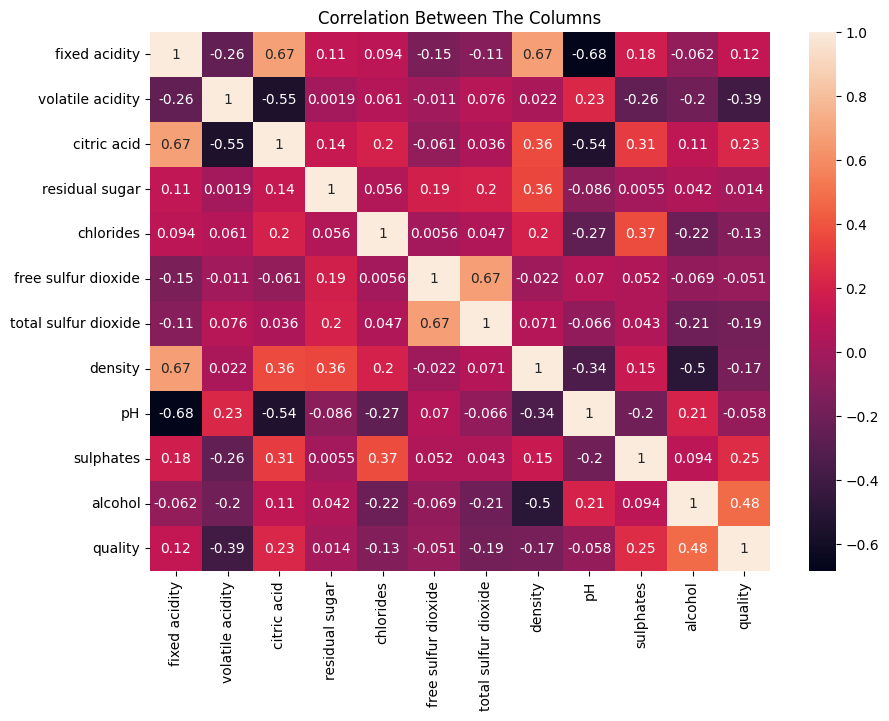

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation Between The Columns')
plt.show()

In [8]:
pip install yellowbrick

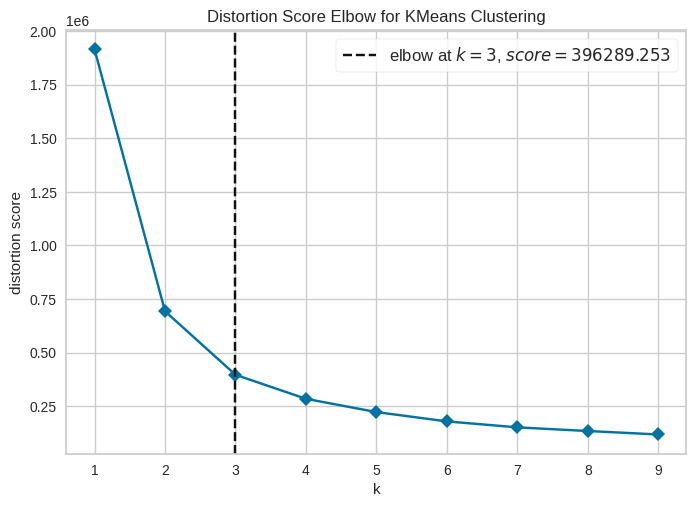

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(wine_df)
visualizer.show()

In [10]:
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(wine_df)
  score = silhouette_score(wine_df, kmeans.labels_)
  print("For Cluster: {}, the silhouette score is: {}".format(i,score))

For Cluster: 2, the silhouette score is: 0.6027870469574543
For Cluster: 3, the silhouette score is: 0.5184003155871573
For Cluster: 4, the silhouette score is: 0.48375934291440664
For Cluster: 5, the silhouette score is: 0.44559419033864445
For Cluster: 6, the silhouette score is: 0.4462630538654589
For Cluster: 7, the silhouette score is: 0.39117348966270293
For Cluster: 8, the silhouette score is: 0.38790448661244487
For Cluster: 9, the silhouette score is: 0.3823228452563935


In [11]:
y = wine_df['quality']
X = wine_df.drop('quality', axis=1)

In [12]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.predict(X)
clusters

array([2, 1, 2, ..., 2, 2, 2], dtype=int32)

In [18]:
pca =  PCA(n_components=2)

reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1","PC2"])
reduced_X['cluster'] = clusters
reduced_X


,PC1,PC2,cluster
0,-1.619530,0.450950,2
1,-0.799170,1.856553,1
2,-0.748479,0.882039,2
3,2.357673,-0.269976,0
4,-1.619530,0.450950,2
...,...,...,...
1594,-2.150500,0.814286,2
1595,-2.214496,0.893101,2
1596,-1.456129,0.311746,2
1597,-2.270518,0.979791,2


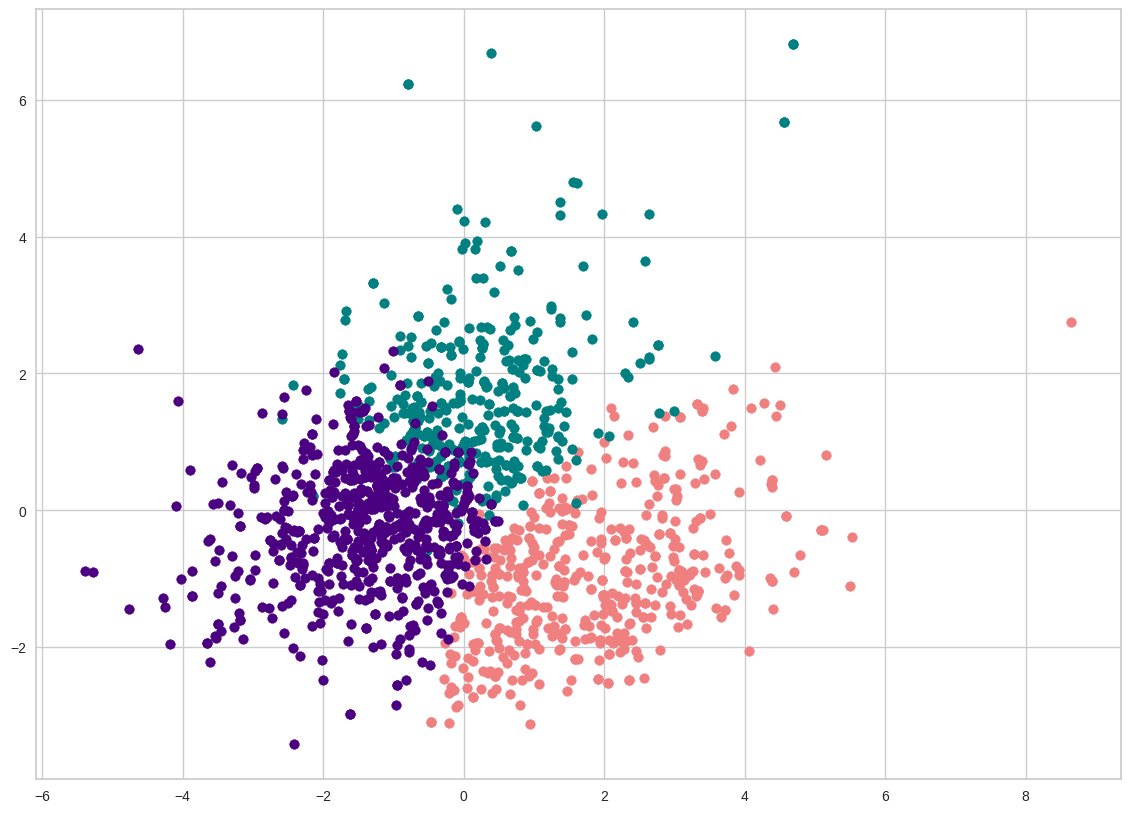

In [19]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='teal')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='indigo')

plt.show()

In [20]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[ 1.80302801, -0.95688206],
       [ 0.23794378,  1.68767171],
       [-1.37721466, -0.21124944]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)
model.fit(X_train, y_train)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 0.65


##2. Reinforcement Learning

1. Identify the possible states the learning agent can be in within the environment.
2. Specify the set of actions the agent can take in each state.
3. Establish a reward function that quantifies the immediate benefit or cost of taking an action in a particular state.
4. Develop a policy that maps states to actions, aiming to maximize the expected cumulative reward over time.
5. Balance exploration (trying new actions) and exploitation (choosing actions with known high rewards) during learning.
6. Adjust Q-values (expected future rewards) through iterative updates based on experienced rewards and learning rate.
7. The agent refines its policy over time, learning to make decisions that lead to higher cumulative rewards in the given environment.

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
GRID_SIZE = 5
START_STATE = (0, 0)
GOAL_STATE = (GRID_SIZE - 1, GRID_SIZE - 1)
OBSTACLES = [(1, 1), (2, 2), (3, 3)]

In [70]:
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EPSILON = 0.1
NUM_EPISODES = 1000

In [71]:
q_values = np.zeros((GRID_SIZE, GRID_SIZE, 4))

In [72]:
def choose_action(state):
    if np.random.rand() < EPSILON:
        return np.random.choice(4)  # Explore
    else:
        return np.argmax(q_values[state])

In [73]:
def q_learning():
    for episode in range(NUM_EPISODES):
        state = START_STATE
        while state != GOAL_STATE:
            action = choose_action(state)
            next_state = update_state(state, action)
            reward = get_reward(next_state)
            q_values[state][action] = (1 - LEARNING_RATE) * q_values[state][action] + \
                                      LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(q_values[next_state]))
            state = next_state


In [74]:
def update_state(state, action):
    x, y = state
    if action == 0:  # Up
        x = max(0, x - 1)
    elif action == 1:  # Down
        x = min(GRID_SIZE - 1, x + 1)
    elif action == 2:  # Left
        y = max(0, y - 1)
    elif action == 3:  # Right
        y = min(GRID_SIZE - 1, y + 1)
    return (x, y)

In [75]:
def get_reward(state):
    return -1 if state in OBSTACLES else 0 if state != GOAL_STATE else 1

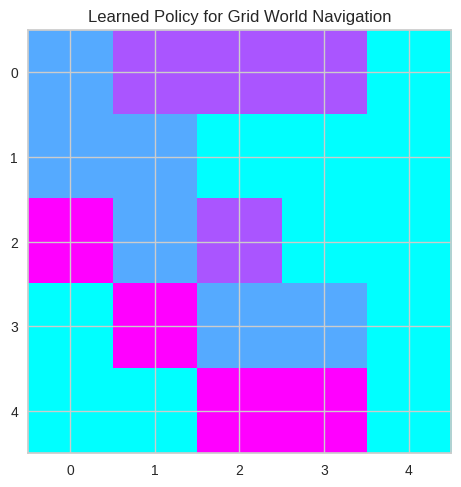

In [76]:
q_learning()

# Visualize the learned policy
def visualize_policy():
    policy = np.argmax(q_values, axis=2)
    plt.imshow(policy, cmap='cool', origin='upper')
    plt.title('Learned Policy for Grid World Navigation')
    plt.show()

visualize_policy()

#Result Analysis :

We found the accuracy of K-Means Algorithm over the Wine Quality dataset to be 0.63. Indicating that there is not that well defined connection between the object parameters and the subjective "quality of taste".

With Reinforcement Learning we were able to visualize development of a grid clearance model

#Conclusion :

We were successfully able to study and implement unsupervised algorithms such as K-Means. We also implemented reinforcement learning.